<a href="https://colab.research.google.com/github/angeldvilla/collab_python/blob/main/Lab_19_Angel_Villa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizar los datos
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Codificar las etiquetas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Capa convolucional y de pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa fully connected
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 80ms/step - accuracy: 0.3125 - loss: 1.8623 - val_accuracy: 0.5398 - val_loss: 1.2960
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.5042 - loss: 1.3813 - val_accuracy: 0.5781 - val_loss: 1.1920
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.5655 - loss: 1.2264 - val_accuracy: 0.6168 - val_loss: 1.0744
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.5998 - loss: 1.1438 - val_accuracy: 0.6579 - val_loss: 0.9892
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.6287 - loss: 1.0643 - val_accuracy: 0.6654 - val_loss: 0.9597
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6472 - loss: 0.9987 - val_accuracy: 0.6826 - val_loss: 0.9243
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - accuracy: 0.6605 - loss: 0.9768 - val_accuracy: 0.6875 - val_loss: 0.9093
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.6712 - loss: 0.9353 - 

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {scores[1]*100:.2f}%")

Precisión en el conjunto de prueba: 69.54%


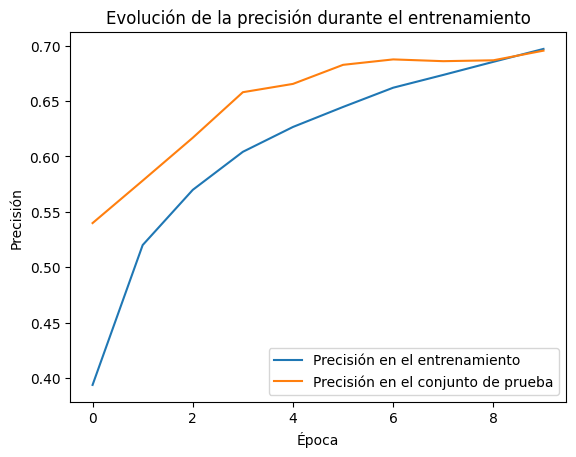

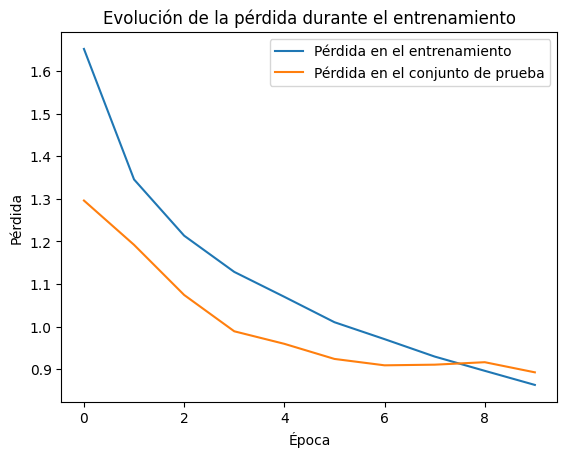

In [ ]:
import matplotlib.pyplot as plt

# Graficar la pérdida y la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión en el entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en el conjunto de prueba')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Evolución de la precisión durante el entrenamiento')
plt.show()

plt.plot(history.history['loss'], label='Pérdida en el entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en el conjunto de prueba')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


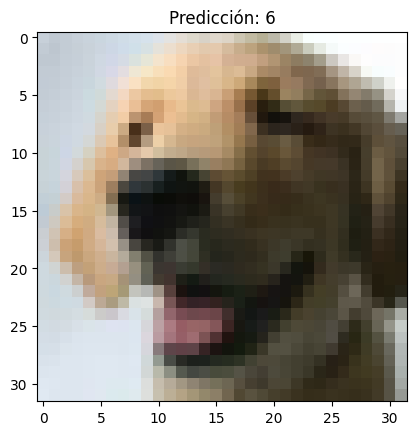

In [ ]:
# Hacer predicciones sobre el conjunto de prueba
predictions = model.predict(X_test)

# Mostrar una imagen con su predicción
import numpy as np
index = np.random.randint(0, X_test.shape[0])
plt.imshow(X_test[index])
plt.title(f"Predicción: {np.argmax(predictions[index])}")
plt.show()